In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import linear_model  # importing to do linear regression
%matplotlib inline 
import math
from sklearn import metrics
from sklearn.metrics import r2_score
# visualize the graph in result itself we included the line

In [3]:
# read data set
dataset_train = pd.read_csv('father_son_heights.csv')


# assign data into panda data frames
x_train = dataset_train['Father'].values.reshape(-1,1)
#reshaping the 1D array to 2 D to make it easy for sklearn. List to array

y_train = dataset_train['Son'].values.reshape(-1,1)
#print ("Training data \n",dataset_train)
x_train1=x_train[0:807]
y_train1=y_train[0:807]
x_test1=x_train[808:]
y_test1=y_train[808:]

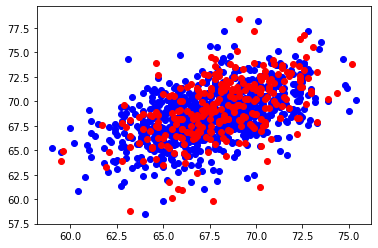

In [4]:
plt.scatter(x_train1, y_train1, color='blue')
plt.scatter(x_test1,y_test1,color='red')

In [5]:
# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(x, eta): 
    return np.dot(x, eta) 
  
# function to compute gradient of error function w.r.t. eta 
def gradient(x, y, eta): 
    h = hypothesis(x, eta) 
    grad = np.dot(x.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of eta 
def height(x, y, eta): 
    h = hypothesis(x, eta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(x, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((x, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        x_mini = mini_batch[:, :-1] 
        y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((x_mini, y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        x_mini = mini_batch[:, :-1] 
        y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((x_mini, y_mini)) 
        #print(mini_batches)
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(x, y, learning_rate = 0.00001, batch_size = 2): 
    eta = np.zeros((x.shape[1], 1)) 
    error_list = [] 
    max_iters = 100
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(x, y, batch_size) 
        for mini_batch in mini_batches: 
            x_mini, y_mini = mini_batch 
            eta = eta - learning_rate * gradient(x_mini, y_mini, eta) 
            error_list.append(height(x_mini, y_mini, eta)) 
  
    return eta, error_list 

Height =  [1.01604912]
Coefficients =  []


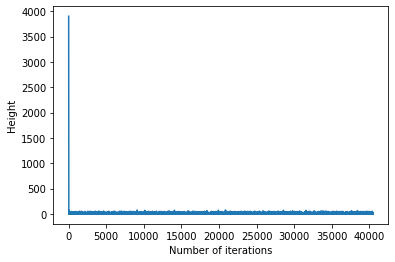

In [6]:
eta, error_list = gradientDescent(x_train1, y_train1) 
print("Height = ", eta[0]) 
print("Coefficients = ", eta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Height") 
plt.show() 

In [1]:
# predicting output for x_test 
y_pred = hypothesis(x_test1, eta) 
plt.scatter(x_test1[:, 0], y_test1[:, ], marker = '.') 
plt.plot(x_test1[:, 0], y_pred, color = 'orange') 
plt.savefig('Minibatch_gradient_descent_line.png')
  
# calculating error in predictions 
error = np.sum(np.abs(y_test1 - y_pred) / y_test1.shape[0]) 
print("RSE = ", error) 

NameError: name 'hypothesis' is not defined

In [27]:

r2_score(y_test1, y_pred)

rmse=math.sqrt(error)
r2=r2_score(x_test1,y_test1)
print("mse = \n",error)
print("rmse = \n",rmse)
print("r2 = \n",r2)


mse = 
 2.366314403236423
rmse = 
 1.5382829399159386
r2 = 
 -0.27334500307616705
